In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

import neural_net
import performance

In [2]:
np.random.seed(1)

def load_data():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5',"r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 0. It's a non-cat picture.


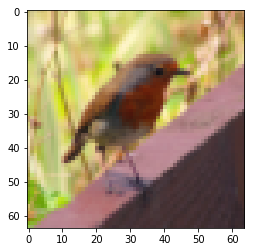

In [4]:
# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [5]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [6]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


## Non-regularized model

**CONSTANTS DEFINING THE MODEL**

In [7]:
layers_dims = (train_x.shape[0], 20, 7, 5, 1) #  4-layer model
init_method = 'he'
activations = ('relu', 'sigmoid')
lambd = 0
optimizer_name = 'adam'
num_epochs = 200

**TUNING THE LEARNING RATE**

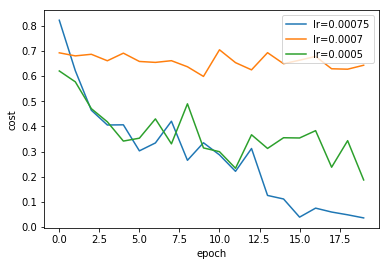

In [8]:
np.random.seed(2)
learning_rates = [0.00075, 0.0007, 0.0005]
for lr in learning_rates:
    clf = neural_net.MLNN(layers_dims, init_method, activations, lambd, optimizer_name, lr, num_epochs)
    clf.train(train_x, train_y)
    params = clf.get_params()
    plt.plot(np.squeeze(params['costs']), label='lr={}'.format(lr))
    plt.ylabel('cost')
    plt.xlabel('epoch')
    plt.legend(loc='upper right')
plt.show()

**TRAINING THE MODEL WITH THE BEST LEARNING RATE**

In [9]:
np.random.seed(2)
layers_dims = (train_x.shape[0], 20, 7, 5, 1) #  4-layer model
init_method = 'he'
activations = ('relu', 'sigmoid')
lambd = 0
learning_rate = 0.00075
optimizer_name = 'adam'
num_epochs = 200

clf = neural_net.MLNN(layers_dims, init_method, activations, lambd, optimizer_name, learning_rate, num_epochs)
clf.train(train_x, train_y)

**MAKING PREDICTIONS**


In [10]:
pred_train = clf.predict(train_x)
pred_test = clf.predict(test_x)

**COMPUTING THE MODEL'S ACCURACY**


In [11]:
non_reg_acc_train = performance.compute_accuracy(train_y, pred_train)
print('Non regularized model training accuracy: ', non_reg_acc_train, '%')

non_reg_acc_test = performance.compute_accuracy(test_y, pred_test)
print('Non regularized model test accuracy: ', non_reg_acc_test, '%')

Non regularized model training accuracy:  100.0 %
Non regularized model test accuracy:  74.0 %


**GETTING THE MODEL'S PARAMETERS**


In [12]:
params = clf.get_params()
print(params.keys())

dict_keys(['init_method', 'beta2', 'layers_dims', 'activations', 'learning_rate', 'weights', 'beta1', 'num_epochs', 'lambda', 'minibatch_size', 'costs', 'optimizer'])


**COST PLOT**


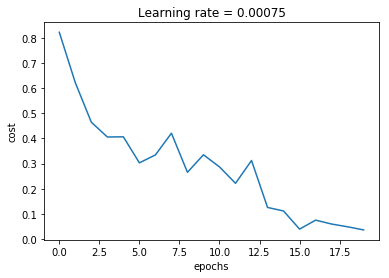

In [13]:
plt.plot(np.squeeze(params['costs']))
plt.ylabel('cost')
plt.xlabel('epochs')
plt.title("Learning rate = " + str(params['learning_rate']))
plt.show()

## Regularized model
We're going to set $lambda=0.8$ and see if the overfitting will be reduced.

In [43]:
np.random.seed(2)
lambd = 0.8

clf = neural_net.MLNN(layers_dims, init_method, activations, lambd, optimizer_name, learning_rate, num_epochs)
clf.train(train_x, train_y)

**MAKING PREDICTIONS**


In [44]:
pred_train = clf.predict(train_x)
pred_test = clf.predict(test_x)

**COMPUTING ACCURACY**


In [45]:
reg_acc_train = np.round(performance.compute_accuracy(train_y, pred_train), 3)
print('Regularized model (lambd={}) training accuracy: '.format(lambd), reg_acc_train, '%')

reg_acc_test = np.round(performance.compute_accuracy(test_y, pred_test), 3)
print('Regularized model (lambd={}) training accuracy: '.format(lambd), reg_acc_test, '%')

Regularized model (lambd=0.8) training accuracy:  95.694 %
Regularized model (lambd=0.8) training accuracy:  74.0 %


**COST PLOT**


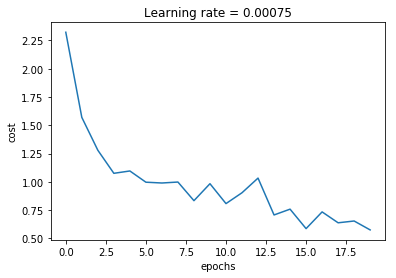

In [46]:
params = clf.get_params()
plt.plot(np.squeeze(params['costs']))
plt.ylabel('cost')
plt.xlabel('epochs')
plt.title("Learning rate = " + str(params['learning_rate']))
plt.show()

### Summary

<table> 
    <tr>
        <td>
            <b>Model</b>
        </td>
        <td>
        <b>Lambda</b>
        </td>
        <td>
        <b>Training accuracy</b>
        </td>
        <td>
        <b>Test accuracy</b>
        </td>
    </tr>
    <tr>
        <td>
        Non regularized
        </td>
        <td>
        0
        </td>
        <td>
        100%
        </td>
        <td>
        74%
        </td>
    </tr>
        <tr>
        <td>
        Regularized
        </td>
        <td>
        0.8
        </td>
        <td>
        95.6%
        </td>
        <td>
        74%
        </td>
    </tr>
</table> 
